# WeatherPy
----

#### Observations

1. Maximum temperature of cities on earth follow a normal distribution which peaks near the equator.
2. Average percent cloudiness does not seem to be affected by proximity to the equator.
3. Average percent humidity in the Southern Hemisphere increases as a city's latitude approaches the equator, but the converse
    is true in the Northern Hemisphere.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# NOTE: if citipy is failing, run <pip install citipy> in your environment
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# set log filename
log_file = "output_data/print_log.txt"

# grab current date for plot titles
curr_date = datetime.today().strftime('%m-%d-%Y')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create base url and indicate desired units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# add API key to base url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
clean_cities = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []


# open the log file and gather city data
with open(log_file, "w") as logfile:
    
    # Loop through the list of cities and make a request to OpenWeather
    for city in cities:
        response = requests.get(query_url + city).json()

        try:
            # grab the data items we need from the json response
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            clean_cities.append(city.title())
            
            # write an entry to the log file and the console
            logfile.write(f"City ID: {response['id']} City Name: {city}\n")
            print(f"City ID: {response['id']} City Name: {city}")
       
        except KeyError:
            # the city was not found on OpenWeather,
            # write to log file and move on to the next city
            logfile.write(f"**{city} not found**\n")
            print(f"**{city} not found**")
            continue
    
    # write the number of cities found to the log and the console
    logfile.write(f"Number of cities: {len(lat)}")
    print(f"Number of cities: {len(lat)}")



City ID: 5855927 City Name: hilo
City ID: 2158767 City Name: mareeba
City ID: 3985710 City Name: cabo san lucas
City ID: 2017155 City Name: saskylakh
City ID: 4803372 City Name: cross lanes
City ID: 1006984 City Name: east london
City ID: 2163355 City Name: hobart
City ID: 281133 City Name: gasa
City ID: 3369157 City Name: cape town
City ID: 88533 City Name: awjilah
City ID: 935215 City Name: saint-philippe
City ID: 937136 City Name: zeerust
City ID: 1507390 City Name: dikson
City ID: 4031574 City Name: provideniya
City ID: 6137462 City Name: saint-augustin
City ID: 5000950 City Name: marquette
City ID: 6170031 City Name: tuktoyaktuk
City ID: 2110227 City Name: butaritari
City ID: 546105 City Name: nikolskoye
City ID: 3406844 City Name: baiao
City ID: 5122534 City Name: jamestown
City ID: 2439376 City Name: tahoua
**samusu not found**
City ID: 1563281 City Name: tuy hoa
**taolanaro not found**
City ID: 556268 City Name: ostrovnoy
City ID: 3712076 City Name: colon
City ID: 1511057 City 

City ID: 3374083 City Name: bathsheba
City ID: 2126682 City Name: bilibino
City ID: 4033557 City Name: tautira
City ID: 5838199 City Name: sheridan
City ID: 3416888 City Name: grindavik
City ID: 2446796 City Name: bilma
City ID: 2033630 City Name: xiongyue
City ID: 1489853 City Name: tazovskiy
City ID: 1651810 City Name: airai
**grand river south east not found**
City ID: 3883457 City Name: lebu
City ID: 5866583 City Name: kodiak
City ID: 1568574 City Name: qui nhon
City ID: 2092164 City Name: lorengau
City ID: 4021858 City Name: guerrero negro
City ID: 3466980 City Name: caravelas
City ID: 5367788 City Name: lompoc
City ID: 3175096 City Name: lasa
City ID: 3589256 City Name: santa maria chiquimula
City ID: 456202 City Name: rezekne
City ID: 5720495 City Name: coos bay
City ID: 2013279 City Name: vostok
City ID: 3456248 City Name: nortelandia
City ID: 2122605 City Name: okhotsk
City ID: 1787858 City Name: shangrao
City ID: 5861897 City Name: fairbanks
City ID: 1808747 City Name: hecun


City ID: 2093967 City Name: kimbe
City ID: 1293625 City Name: dawei
City ID: 3526756 City Name: isla mujeres
City ID: 86049 City Name: jalu
City ID: 1685422 City Name: sulangan
City ID: 584365 City Name: abrau-dyurso
City ID: 4033543 City Name: teahupoo
City ID: 104515 City Name: mecca
City ID: 569497 City Name: chelno-vershiny
City ID: 2155562 City Name: nelson bay
City ID: 1282666 City Name: tikapur
City ID: 1181065 City Name: chitral
City ID: 3567995 City Name: bahia honda
City ID: 3906209 City Name: rurrenabaque
City ID: 154097 City Name: mgandu
City ID: 563471 City Name: energetik
**pribelskiy not found**
City ID: 4034551 City Name: faanui
City ID: 1641497 City Name: kanigoro
City ID: 1625929 City Name: sungaipenuh
City ID: 3405852 City Name: belem de sao francisco
City ID: 3723593 City Name: jeremie
City ID: 2027044 City Name: batagay
City ID: 2071860 City Name: esperance
City ID: 2212775 City Name: sabha
City ID: 2704613 City Name: hudiksvall
City ID: 863061 City Name: usinsk
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dataframe and write to a CSV file
weather_df = pd.DataFrame({"City": clean_cities, "Lat": lat, "Lng": lon, "Max Temp": max_temp,
                           "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": windspeed,
                           "Country": country, "Date": date})

weather_df.to_csv(output_data_file, index=False)

In [6]:
# display the dataframe
weather_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,69.80,78,1,6.91,US,1610090621
1,Mareeba,-17.0000,145.4333,86.00,79,75,4.61,AU,1610090246
2,Cabo San Lucas,22.8909,-109.9124,61.00,68,0,1.01,MX,1610090457
3,Saskylakh,71.9167,114.0833,-25.15,85,99,6.76,RU,1610090151
4,Cross Lanes,38.4204,-81.7907,35.01,80,90,6.91,US,1610090458
5,East London,-33.0153,27.9116,73.40,78,20,17.27,ZA,1610090190
6,Hobart,-42.8794,147.3294,69.01,63,20,17.27,AU,1610089986
7,Gasa,31.5000,34.4667,66.99,35,0,1.99,PS,1610090458
8,Cape Town,-33.9258,18.4232,75.00,53,0,18.41,ZA,1610090281
9,Awjilah,29.1081,21.2869,61.61,48,14,1.86,LY,1610090459


In [7]:
# show a descriptive summary of the data in the dataframe
# to check for erroneous humidity data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.206212,19.490938,48.180018,74.437828,55.406305,8.162890,1.610090e+09
std,33.181560,91.404000,32.117084,19.410006,40.485989,6.103341,1.869640e+02
min,-54.800000,-179.166700,-46.910000,8.000000,0.000000,0.250000,1.610090e+09
25%,-6.887650,-61.256700,26.600000,67.000000,2.000000,3.440000,1.610090e+09
50%,26.557900,23.242000,55.920000,79.000000,75.000000,6.550000,1.610091e+09
75%,48.650050,102.389850,75.200000,88.000000,93.000000,11.455000,1.610091e+09
max,78.218600,179.316700,100.990000,100.000000,100.000000,35.680000,1.610091e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# get the indices of cities that have humidity over 100%
# and drop those rows
bad_humidity = weather_df.loc[weather_df["Humidity"] > 100].index.to_list()
weather_df = weather_df.drop(index=bad_humidity)

In [9]:
# define function to build scatter plots
def scatter_plot(df, y_col, y_title, y_label):
    latitude = df["Lat"]
    y_axis = df[y_col]

    # generate a scatter plot of latitude vs. temperature
    plt.scatter(latitude, y_axis, facecolor="purple")

    # set limits for chart
    plt.xlim(min(latitude)-5, max(latitude)+5)
    plt.ylim(min(y_axis)-5, max(y_axis)+5)

    # create title and axis labels
    plot_title = f"City Latitude vs.{y_title} ({curr_date})"
    plt.title(plot_title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # add a grid
    plt.grid()

    # build filename, write chart to file, and display to console
    scatter_file = f"output_data/Latv{y_col}_scatter{curr_date}.png"
    plt.tight_layout()
    plt.savefig(scatter_file)
    plt.show()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

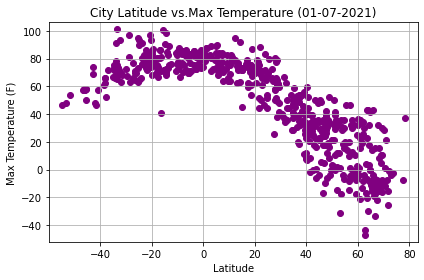

In [10]:
# create a Latitude vs. Max Temperature scatter plot
scatter_plot(weather_df, "Max Temp", "Max Temperature", "Max Temperature (F)")

Plotting the relationship between the latitude of a city and its maximum temperature shows how the maximum temperature is highest in cities nearer the equator (latitude = 0), and decreases the farther the city is removed from the equator.  This chart shows the tendency toward a normal distribution.

## Latitude vs. Humidity Plot

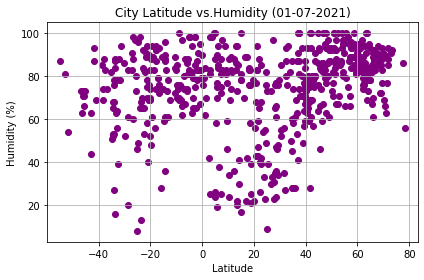

In [11]:
# create a Latitude vs. Humidity scatter plot
scatter_plot(weather_df, "Humidity", "Humidity", "Humidity (%)")

Plotting the relationship between the latitude of a city and its percent humidity shows how the humidity is very high nearest the equator (latitude = 0), and falls off as cities lie farther from the equator.  We also see an increase in humidity levels again as the location of the city approaches the 60th parallel north.  This could be explained by relative air and water temperatures in those areas, or some other climate phenomenon.

## Latitude vs. Cloudiness Plot

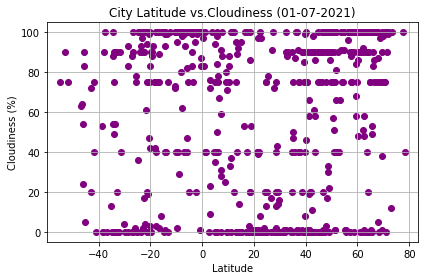

In [12]:
# create a Latitude vs. Cloudiness scatter plot
scatter_plot(weather_df, "Cloudiness", "Cloudiness", "Cloudiness (%)")

Plotting the relationship between the latitude of a city and its percent cloudiness shows how cloudiness is not affected by how close a city is to the equator.  This chart shows no correlation between these variables.

## Latitude vs. Wind Speed Plot

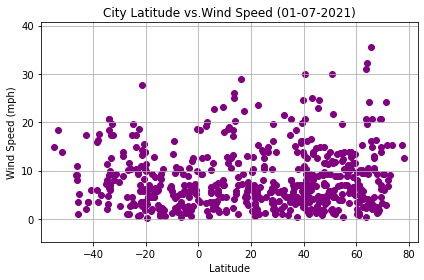

In [13]:
# create a Latitude vs. Max Temperature scatter plot
scatter_plot(weather_df, "Wind Speed", "Wind Speed", "Wind Speed (mph)")

Plotting the relationship between the latitude of a city and its average wind speed shows how wind speed is not affected by how close a city is to the equator.  This chart shows no correlation between these variables.

## Linear Regression

In [14]:
# define function to perform linear regression and
# create a scatter plot
def linear_regress(hem_df, y_col, hem_name, y_title, y_label):
    # pull latitude and y column data for plotting
    latitude = hem_df["Lat"]
    y_axis = hem_df[y_col]

    # run linear regression calculations
    reg = linregress(latitude, y_axis)

    # display the r-value
    print(f"\nThe r-value is: {reg.rvalue}")

    # calculate the y values for our line, and format the equation
    # for the plot
    y_values = latitude * reg.slope + reg.intercept
    line_eq = f"y = {reg.slope:.2f}x + {reg.intercept:.2f}"

    # plot the points and linear regression
    plt.scatter(latitude, y_axis, facecolor="lightblue", edgecolor="skyblue")
    plt.plot(latitude, y_values, color="darkblue")
    plt.annotate(line_eq, (min(latitude),min(y_axis)), fontsize=10, color="darkblue")

    # set limits for chart
    plt.xlim(min(latitude)-5, max(latitude)+5)
    plt.ylim(min(y_axis)-5, max(y_axis)+5)


    # create title and axis labels
    plot_title = f"{hem_name} Hemisphere City Latitude vs. {y_title} ({curr_date})"
    plt.title(plot_title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # add a grid
    plt.grid()

    # build filename, write chart to file, and display to console
    scatter_file = f"output_data/{hem_name}_Latv{y_title}_linregress{curr_date}.png"
    plt.tight_layout()
    plt.savefig(scatter_file)
    plt.show()


In [15]:
# create dataframes for norther and southern hemisphere data
northernhem_df = weather_df.loc[weather_df["Lat"] >= 0]
southernhem_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: -0.8586818360907581


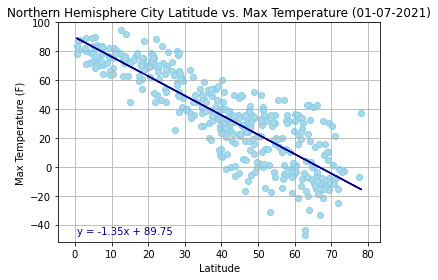

In [16]:
# run linear regression for Northern Hemishpere Max Temp vs. Latitude
linear_regress(northernhem_df, "Max Temp", "Northern", "Max Temperature", "Max Temperature (F)")

Plotting the relationship between the latitude of a city in the Northern Hemisphere and its maximum temperature shows how the maximum temperature is highest in cities nearer the equator (latitude = 0), and decreases the farther the city is removed from the equator.  There is a strong negative correlation to the data.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.507669815498605


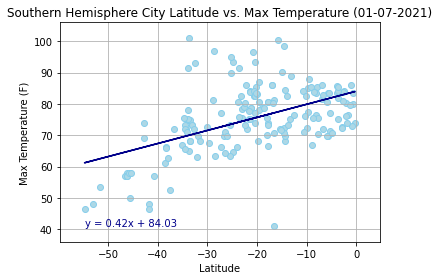

In [17]:
# run linear regression for Southern Hemishpere Max Temp vs. Latitude
linear_regress(southernhem_df, "Max Temp", "Southern", "Max Temperature", "Max Temperature (F)")

Plotting the relationship between the latitude of a city in the Southern Hemisphere and its maximum temperature shows how the maximum temperature is highest in cities nearer the equator (latitude = 0), and decreases the farther the city is removed from the equator.  There is a moderate positive correlation to the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.39406794935872336


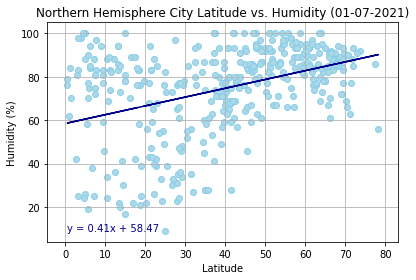

In [18]:
# run linear regression for Northern Hemishpere Humidity vs. Latitude
linear_regress(northernhem_df, "Humidity", "Northern", "Humidity", "Humidity (%)")

Plotting the relationship between the latitude of a city in the Northern Hemisphere and its average percent humidity shows a weak positive correlation to the data as the city's latitude moves farther from the equator.    Predictions based on the linear regression will be difficult to make.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.2326930269657022


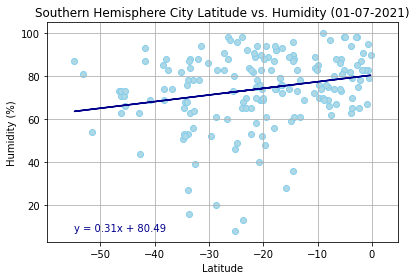

In [19]:
# run linear regression for Southern Hemishpere Humidity vs. Latitude
linear_regress(southernhem_df, "Humidity", "Southern", "Humidity", "Humidity (%)")

Plotting the relationship between the latitude of a city in the Southern Hemisphere and its average percent humidity shows a moderate positive correlation to the data as the city's latitude approaches the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.2801704007910918


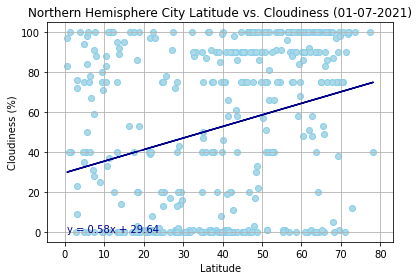

In [20]:
# run linear regression for Northern Hemishpere Cloudiness vs. Latitude
linear_regress(northernhem_df, "Cloudiness", "Northern", "Cloudiness", "Cloudiness (%)")

Plotting the relationship between the latitude of a city in the Northern Hemisphere and its average percent cloudiness shows a weak positive correlation to the data as the city's latitude moves farther from  the equator.    Predictions based on the linear regression will be difficult to make.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.32442596051036554


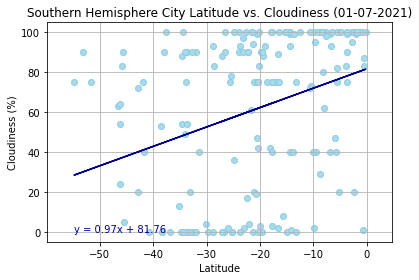

In [21]:
# run linear regression for Southern Hemishpere Cloudiness vs. Latitude
linear_regress(southernhem_df, "Cloudiness", "Southern", "Cloudiness", "Cloudiness (%)")

Plotting the relationship between the latitude of a city in the Southern Hemisphere and its average percent cloudiness shows a weak positive correlation to the data as the city's latitude approaches the equator.  Predictions based on the linear regression will be difficult to make.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.05167014019756708


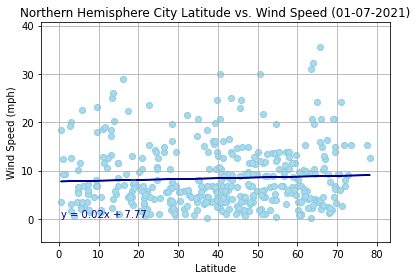

In [22]:
# run linear regression for Northern Hemishpere Wind Speed vs. Latitude
linear_regress(northernhem_df, "Wind Speed", "Northern", "Wind Speed", "Wind Speed (mph)")

Plotting the relationship between the latitude of a city in the Northern Hemisphere and its average wind speed shows a very weak positive correlation to the data as the city's latitude moves farther from the equator.  Predictions based on the linear regression will be difficult to make.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: -0.2759994910584883


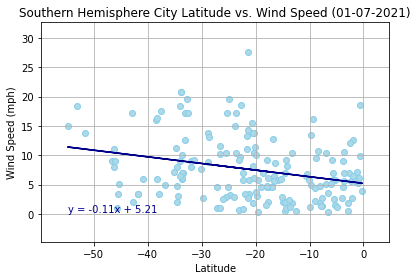

In [23]:
# run linear regression for Southern Hemishpere Wind Speed vs. Latitude
linear_regress(southernhem_df, "Wind Speed", "Southern", "Wind Speed", "Wind Speed (mph)")

Plotting the relationship between the latitude of a city in the Southern Hemisphere and its average wind speed shows a moderate negative correlation to the data as the city's latitude approaches the equator.